In [439]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\das\AppData\Local\Temp\ipykernel_24352\1024788915.py:5: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_sk_G10["time"] = ((pd.to_datetime(df_sk_G10["TimeUTC"]).astype('int64') / 1e6 - float(pd.to_datetime(df_sk_G10["TimeUTC"][0]).to_datetime64()) / 1e6).astype('int64')) / 1e3
C:\Users\das\AppData\Local\Temp\ipykernel_24352\1024788915.py:5: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_sk_G10["time"] = ((pd.to_datetime(df_sk_G10["TimeUTC"]).astype('int64') / 1e6 - float(pd.to_datetime(df_sk_G10["TimeUTC"][0]).to_datetime64()) / 1e6).astype('int64')) / 1e3
C:\Users\das\AppData\Local\Temp\ipykernel_24352\1024788915.py:23: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S.%f format when dayfirst=False (the default) was specif

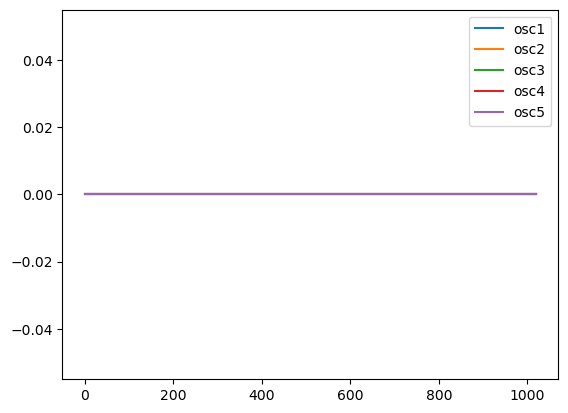

In [440]:
# Случай: Калининградская ТЭЦ-2, генератор Г-10
# Импорт и форматирование csv Поиска СК
df_sk_G10 = pd.read_csv('./Kaliningrad/G-10_result.csv', sep=';', encoding="windows-1251", decimal=',')
df_sk_G10.columns = ["TimeUTC", "def_P_amp", "def_P_freq"]
df_sk_G10["time"] = ((pd.to_datetime(df_sk_G10["TimeUTC"]).astype('int64') / 1e6 - float(pd.to_datetime(df_sk_G10["TimeUTC"][0]).to_datetime64()) / 1e6).astype('int64')) / 1e3
# Импорт и форматирование csv СМСР
df_ext = pd.read_csv('./Kaliningrad/SMSR_SIG_EXT_G-10_data.csv', sep=';', encoding="windows-1251")
# Создаем таблицу diagno с выводом ошибок алгоритма СМСР (берем часть колонок из df_ext)
diagno = df_ext[["osh_ARV1_ext[6]", "osh_ARV1_ext[7]", "osh_ARV1_ext[8]", "osh_ARV1_ext[9]", "osh_ARV1_ext[10]"]]
diagno.columns = ["bug1", "bug2", "bug3", "bug4", "bug5"]
# Создаем таблицу result_osc для вывода расчетов типов данных алгоритма СМСР (берем часть колонок из df_ext)
results = df_ext[["osh_ARV1_ext[{:d}]".format(i) for i in range(11, 25)]]
results.columns = ["osc1_f", "osc1_phi", "osc1_np", "osc2_f", "osc2_phi", "osc2_np", "osc3_f", "osc3_phi", "osc3_np", "osc4_f", "osc4_phi", "osc4_np", "osc5_f", "osc5_amp"]
# Создаем таблицу osh для вывода выходных сигналов алгоритма СМСР (берем часть колонок из df_ext)
osh = df_ext[["osh_ARV1_ext[1]", "osh_ARV1_ext[2]", "osh_ARV1_ext[3]", "osh_ARV1_ext[4]", "osh_ARV1_ext[5]"]]
osh.columns = ["osc1", "osc2", "osc3", "osc4", "osc5"]
osh.plot()
# df_sk_G10.head()

# Случай: Калининградская ТЭЦ-2, генератор Г-11
df_sk_G11 = pd.read_csv('./Kaliningrad/G-11_result.csv', sep=';', encoding="windows-1251", decimal=',')
df_sk_G11.columns = ["TimeUTC", "def_P_amp", "def_P_freq"]
df_sk_G11["time"] = ((pd.to_datetime(df_sk_G11["TimeUTC"]).astype('int64') / 1e6 - float(pd.to_datetime(df_sk_G11["TimeUTC"][0]).to_datetime64()) / 1e6).astype('int64')) / 1e3

# Случай: Калининградская ТЭЦ-2, генератор Г-12
df_sk_G12 = pd.read_csv('./Kaliningrad/G-12_result.csv', sep=';', encoding="windows-1251", decimal=',')
df_sk_G12.columns = ["TimeUTC", "def_P_amp", "def_P_freq"]
df_sk_G12["time"] = ((pd.to_datetime(df_sk_G12["TimeUTC"]).astype('int64') / 1e6 - float(pd.to_datetime(df_sk_G12["TimeUTC"][0]).to_datetime64()) / 1e6).astype('int64')) / 1e3

In [441]:
# Краткая сводка по расчетам СМСР
results_osc.describe()

,osc1_f,osc1_phi,osc1_np,osc2_f,osc2_phi,osc2_np,osc3_f,osc3_phi,osc3_np,osc4_f,osc4_phi,osc4_np,osc5_f,osc5_amp
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.0
mean,0.003342,0.076843,0.021569,0.006379,-0.684763,0.010784,0.656591,-36.407028,0.762745,0.832671,-1.975040,0.090196,0.944534,0.0
std,0.024008,20.871258,0.145341,0.062161,7.351421,0.103337,0.366955,21.624331,0.425609,2.684481,14.033587,0.286603,0.341264,0.0
min,0.000000,-177.022000,0.000000,0.000000,-113.265000,0.000000,0.000000,-100.944000,0.000000,0.000000,-167.236000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.826750,-49.903000,1.000000,0.000000,0.000000,0.000000,0.854000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.855000,-45.495500,1.000000,0.000000,0.000000,0.000000,0.862000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.866000,-25.156750,1.000000,0.000000,0.000000,0.000000,0.874000,0.0
max,0.264000,168.292000,1.000000,0.737000,0.000000,1.000000,1.262000,11.949000,1.000000,10.981000,58.685000,1.000000,4.442000,0.0


<Axes: >

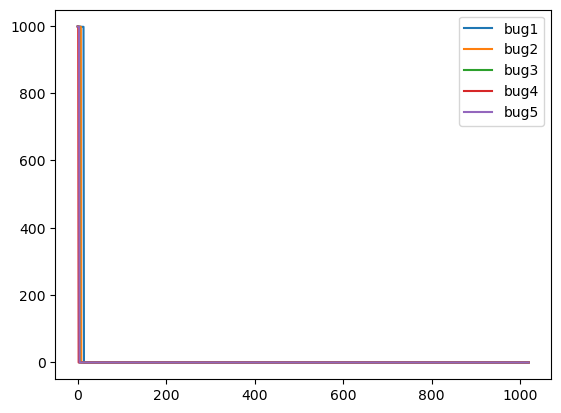

In [442]:
# Краткая сводка по багам СМСР
diagno.iloc[0:,:].plot()

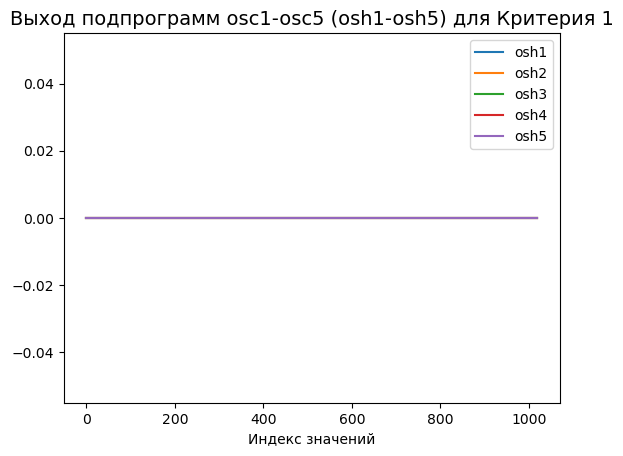

In [443]:
# Выход подпрограмм osc1-osc5 (osh1-osh5) Критерия 1
plt.title('Выход подпрограмм osс1-osс5 (osh1-osh5) для Критерия 1', fontsize=14)
plt.xlabel('Индекс значений')
plt.plot(osh["osc1"])
plt.plot(osh["osc2"])
plt.plot(osh["osc3"])
plt.plot(osh["osc4"])
plt.plot(osh["osc5"])
plt.grid(False)
plt.legend(['osh1','osh2','osh3','osh4','osh5'])
plt.show()

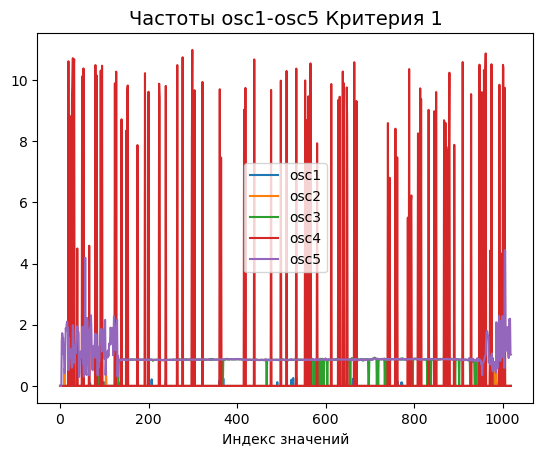

In [444]:
# Частоты osc1-osc5 Критерия 1
plt.title('Частоты osc1-osc5 Критерия 1', fontsize=14)
plt.xlabel('Индекс значений')
plt.plot(results["osc1_f"])
plt.plot(results["osc2_f"])
plt.plot(results["osc3_f"])
plt.plot(results["osc4_f"])
plt.plot(results["osc5_f"])
plt.grid(False)
plt.legend(['osc1','osc2','osc3','osc4','osc5'])
plt.show()

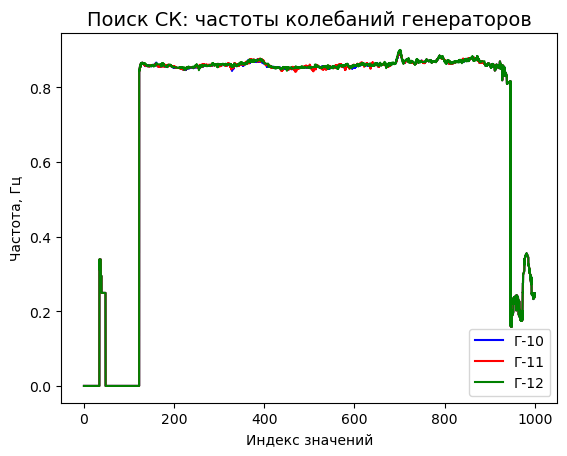

In [445]:
# Поиск СК - групповая частота
plt.title('Поиск СК: частоты колебаний генераторов', fontsize=14)
plt.xlabel('Индекс значений')
plt.ylabel('Частота, Гц')
plt.plot(df_sk_G10["time"],df_sk_G10["def_P_freq"],'b')
plt.plot(df_sk_G11["time"],df_sk_G11["def_P_freq"],'r')
plt.plot(df_sk_G12["time"],df_sk_G12["def_P_freq"],'g-')
plt.grid(False)
plt.legend(['Г-10','Г-11','Г-12'])
plt.show()

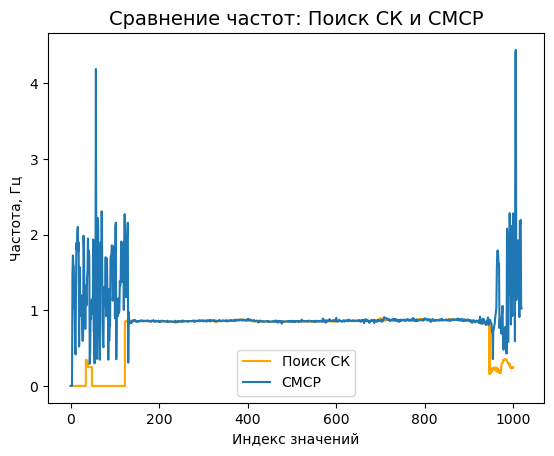

In [446]:
# Поиск СК и СМСР - частота
plt.title('Сравнение частот: Поиск СК и СМСР', fontsize=14)
plt.xlabel('Индекс значений')
plt.ylabel('Частота, Гц')
plt.plot(df_sk_G10["time"], df_sk_G10["def_P_freq"], 'orange')
plt.plot(results["osc5_f"])
plt.grid(False)
plt.legend(['Поиск СК','СМСР'])
plt.show()

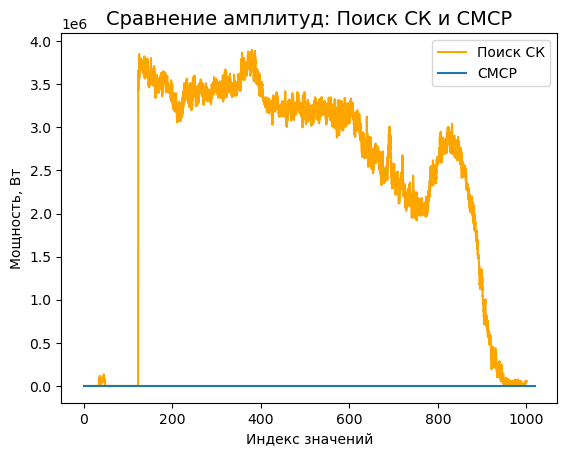

In [447]:
# Поиск СК и СМСР
plt.title('Сравнение амплитуд: Поиск СК и СМСР', fontsize=14)
plt.xlabel('Индекс значений')
plt.ylabel('Мощность, Вт')
plt.plot(df_sk_G10["time"], df_sk_G10["def_P_amp"], 'orange')
plt.plot(results["osc5_amp"])
plt.grid(False)
plt.legend(['Поиск СК','СМСР'])
plt.show()